# Pymaceuticals Inc.
---

# Analysis

Based on the analysis of the regimen data, here are three observations or inferences:

#### Weight as a Predictive Factor: 

The strong correlation between mouse weight and tumor volume suggests that weight could be used as a predictive factor for tumor growth. This could be useful in early-stage research to identify which mice might develop larger tumors and require more aggressive treatment.


#### Outlier Analysis:
The identification of outliers, such as the one observed in the Infubinol treatment group, indicates that while most mice respond predictably to the treatment, there are exceptions. Investigating these outliers further could provide insights into why certain mice do not respond as expected, potentially leading to improvements in treatment protocols.


#### Consistency in Tumor Volume Reduction:
The box plot analysis reveals that there are few outliers in the tumor volumes for mice treated with Capomulin. This suggests that the treatment is consistently effective across different mice, with most mice showing similar reductions in tumor volume.


 

In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data\Mouse_metadata.csv"
study_results_path = "data\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Complete_Mouse_Study= pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

#Display the data table for preview
Complete_Mouse_Study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [61]:
# Checking the number of mice.
Nb_Of_Mice= mouse_metadata['Mouse ID'].nunique()
Nb_Of_Mice

249

In [62]:
# Our data should be uniquely identified by Mouse ID and Timepoint
Duplicate_Data = Complete_Mouse_Study[Complete_Mouse_Study.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
Duplicate_Mouse_ID = Duplicate_Data['Mouse ID'].unique()
Duplicate_Mouse_ID

array(['g989'], dtype=object)

In [63]:
# Optional: Get all the data for the duplicate mouse ID.
Duplicate_Data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [64]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Final_Data = Complete_Mouse_Study.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep="first")
Final_Data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [65]:
#specific_ID = 'g989'
#is_present =  specific_ID in Duplicate_Data['Mouse ID'].values
#print(f"Is {specific_ID} duplicated? {is_present}")

In [66]:
# Checking the number of mice in the clean DataFrame.
Nb_Of_Mice2= Final_Data['Mouse ID'].nunique()
Nb_Of_Mice2

249

## Summary Statistics

In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
Grouping_Value= Complete_Mouse_Study.groupby('Drug Regimen')['Tumor Volume (mm3)']

Mean_Value = Grouping_Value.mean()
Median_Value = Grouping_Value.median()
Variance_Value = Grouping_Value.var()
StandardDev_Value = Grouping_Value.std()
SEM_Value = Grouping_Value.sem()

# Assemble the resulting series into a single summary DataFrame.

Tumor_Volume_Summary = pd.DataFrame({
    'Mean Tumor Volume': Mean_Value,
    'Median Tumor Volume': Median_Value,
    'Tumor Volume Variance': Variance_Value,
    'Tumor Volume Std. Dev.': StandardDev_Value,
    'Tumor Volume Std. Err.':SEM_Value
    })
Tumor_Volume_Summary



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [68]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
TumorVolumeSummary = Complete_Mouse_Study.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem',
)

TumorVolumeSummary


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

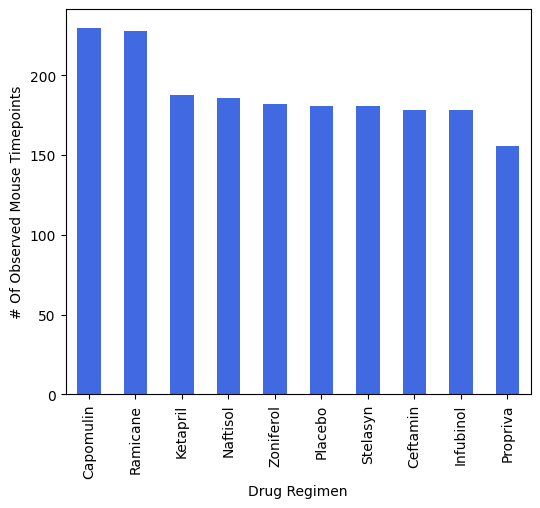

In [69]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

TimepointsNumber = Final_Data.groupby('Drug Regimen')['Timepoint'].count()
TimepointsNumber = TimepointsNumber.sort_values(ascending=False)

TimepointsNumber.plot(kind='bar', figsize=(6, 5), color='royalblue')

plt.xlabel('Drug Regimen')
plt.ylabel('# Of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

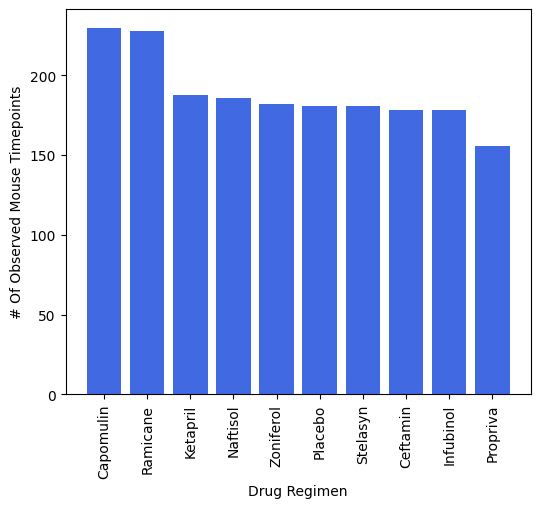

In [70]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
PyPlot_TimepointsNumber = Final_Data.groupby('Drug Regimen')['Timepoint'].count()
PyPlot_TimepointsNumber = PyPlot_TimepointsNumber.sort_values(ascending=False)


plt.figure(figsize=(6, 5))
plt.bar(PyPlot_TimepointsNumber.index, PyPlot_TimepointsNumber.values, color='royalblue')

plt.xlabel('Drug Regimen')
plt.ylabel('# Of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

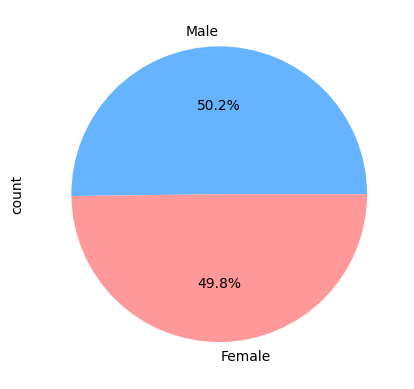

In [71]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
UniqueMice = Final_Data.drop_duplicates(subset='Mouse ID')
Sex_Count = UniqueMice['Sex'].value_counts()

# Make the pie chart
Sex_Count.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title('')
plt.ylabel('count')
plt.show()

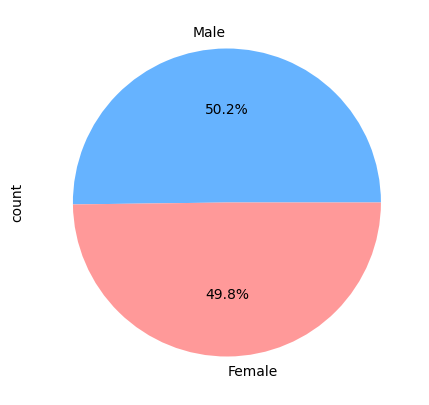

In [72]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
PyPlot_UniqueMice = Final_Data.drop_duplicates(subset='Mouse ID')
PyPlot_Sex_Count = UniqueMice['Sex'].value_counts()

# Make the pie chart
plt.figure(figsize=(6, 5))
plt.pie(PyPlot_Sex_Count, labels=PyPlot_Sex_Count.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.ylabel('count')
plt.show()

## Quartiles, Outliers and Boxplots

In [73]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

Last_Timepoint = Final_Data.groupby('Mouse ID')['Timepoint'].max()
Last_Timepoint= Last_Timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Final_Data_And_Last_Timepoint= Last_Timepoint.merge(Final_Data, on=['Mouse ID', 'Timepoint'], how='left')

Treatment_Final_Data = Final_Data_And_Last_Timepoint[Final_Data_And_Last_Timepoint['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

Treatment_Final_Data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
239,y769,45,68.594745,4,Ceftamin,Female,6,27
240,y793,45,31.896238,2,Capomulin,Male,17,17
241,y865,45,64.729837,3,Ceftamin,Male,23,26
245,z578,45,30.638696,0,Ramicane,Male,11,16


In [74]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds

Regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


Tumor_volume_Data = []


for Regimen in Regimens:

    Treatment_Final_Data = Final_Data_And_Last_Timepoint[Final_Data_And_Last_Timepoint['Drug Regimen'] == Regimen]['Tumor Volume (mm3)']

    Tumor_volume_Data.append(Treatment_Final_Data)

    quartiles = Treatment_Final_Data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    

    outliers = Treatment_Final_Data[(Treatment_Final_Data < lower_bound) | (Treatment_Final_Data > upper_bound)]
    print(f"{Regimen}'s potential outliers: {outliers}")

    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


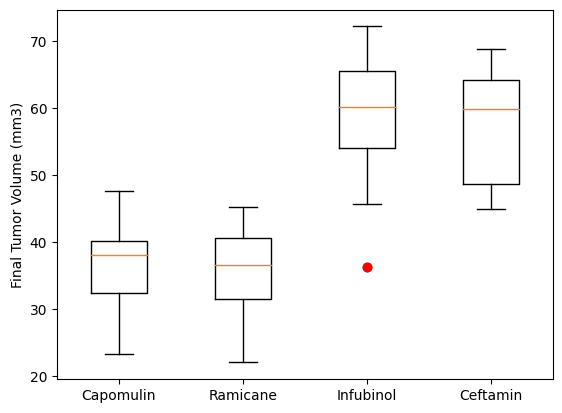

In [75]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

fig, ax = plt.subplots()
ax.boxplot(Tumor_volume_Data, labels=Regimens)

ax.set_ylabel('Final Tumor Volume (mm3)')

for i, treatment in enumerate(Tumor_volume_Data):
    quartiles = treatment.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = treatment[(treatment < lower_bound) | (treatment > upper_bound)]
    ax.plot([i + 1] * len(outliers), outliers, 'ro')

plt.show()

## Line and Scatter Plots

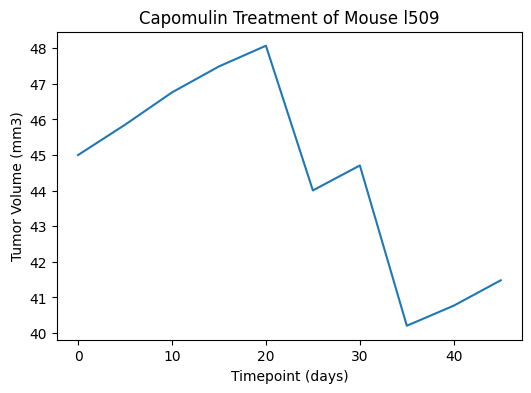

In [76]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_id = 'l509' 
mouse_data = Final_Data[(Final_Data['Mouse ID'] == 'l509') & (Final_Data['Drug Regimen'] == 'Capomulin')]
mouse_data

plt.figure(figsize=(6, 4))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

plt.title(f'Capomulin Treatment of Mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

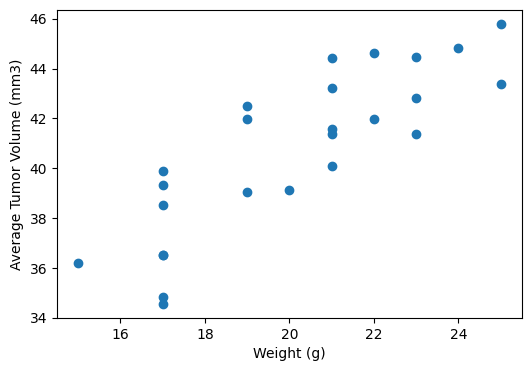

In [77]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

Capomulin_Extract = Final_Data[Final_Data['Drug Regimen'] == 'Capomulin']


Average_Tumor_Volume = Capomulin_Extract.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()


Mouse_Weight = Capomulin_Extract[['Mouse ID', 'Weight (g)']].drop_duplicates()

Merge_Volume_Weight = pd.merge(Average_Tumor_Volume, Mouse_Weight, on='Mouse ID')

plt.figure(figsize=(6, 4))
plt.scatter(Merge_Volume_Weight['Weight (g)'], Merge_Volume_Weight['Tumor Volume (mm3)'], marker='o')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


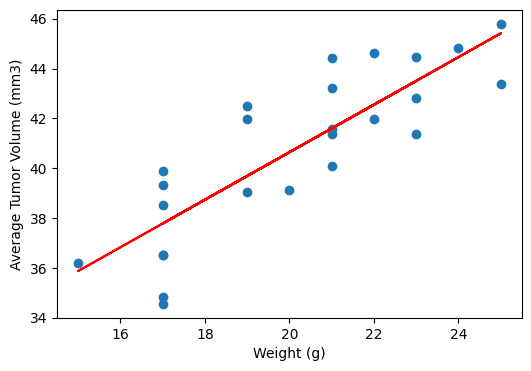

In [78]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

import numpy as np
Corr_Coeff = np.corrcoef(Merge_Volume_Weight['Weight (g)'], Merge_Volume_Weight['Tumor Volume (mm3)'])[0, 1]
print(f"The correlation between mouse weight and the average tumor volume is {Corr_Coeff:.2f}")

import scipy.stats 
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(Merge_Volume_Weight['Weight (g)'], Merge_Volume_Weight['Tumor Volume (mm3)'])

plt.figure(figsize=(6, 4))
plt.scatter(Merge_Volume_Weight['Weight (g)'], Merge_Volume_Weight['Tumor Volume (mm3)'], marker='o')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.plot(Merge_Volume_Weight['Weight (g)'], intercept + slope * Merge_Volume_Weight['Weight (g)'], 'r')

plt.show()